# Análise Fundamentalista da *Tesla*

Análise fundamentalista é um método de avaliação de uma empresa e serve para a tomada de decisão de compra ou venda de um ação em qualquer bolsa de valores. A ideia é saber se os 'fundamentos' da empresa estão bem para; empresa com boa estrutura financeira tendem a valorizar-se e seus preços subirem, além disso, empresas 'saudáveis' também possui bom desempenho no seu lucro, que pode gerar dividendos por longos períodos. O contrário também ocorre, empresas com sua saúde financeira deteriorada acabam perdendo valor de mercado e não gerando lucros.

Para isso vários indicadores, índices e métricas são geradas com base no balanço patrimonial (documento contábil gerado para atestar a situação da empresa e descreve os ativos - bens e direitos - e passivos - obrigações- da mesma historicamente), demonstração dos resultado (documento de natureza econômica que exibe a situação contábil do ano de referência) e o preço diário das ações.

Geralmente pode-se demorar muito para gerar um relatório desse tipo, para avaliar a empresa e a decisão de comprar ou não determinada ação. Por esse motivo existe a biblioteca *Fundamental Analysis* que extrai informações sobre ações de empresas listadas em bolsas americanas e europeias (infelizmente ainda não há uma biblioteca que analisa os dados de empresas brasileiras).


## Importação das bibliotecas

In [147]:
import FundamentalAnalysis as fa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Aplicação da biblioteca *Fundamental Analysis*

Vamos iniciar definindo o *ticker* que é o código da ação da empresa (aqui selecionamos a *Tesla*) e a chave de API que deve ser criada [aqui](https://financialmodelingprep.com/developer/docs/).

In [60]:
ticker = "TSLA"
api_key = "dac31de54b9ed4e14c7b439f0d6f2f65"

## *Companies*

Abaixo vamos visualizar empresas que estão disponíveis para coleta de dados fundamentais e esta é uma lista extensa com mais de 13.000 empresas.

In [61]:
companies = fa.available_companies(api_key)

Abaixo podemos ver que há cerca de 14435 empresas, seus nomes, o preço de suas ações e a bolsa de valores que a ação está listada.

In [62]:
companies

,name,price,exchange
symbol,,,
SPY,SPDR S&P 500,333.7000,NYSE Arca
CMCSA,Comcast Corp,46.7600,Nasdaq Global Select
KMI,Kinder Morgan Inc,12.5950,New York Stock Exchange
INTC,Intel Corp,51.4300,Nasdaq Global Select
MU,Micron Technology Inc,49.7200,Nasdaq Global Select
...,...,...,...
ESLOY,EssilorLuxottica Soci??t?? anonyme,65.8375,Other OTC
PROSY,Prosus N.V.,18.2400,Other OTC
LVMUY,"LVMH Mo??t Hennessy - Louis Vuitton, Soci??t??...",94.3900,Other OTC


In [114]:
companies.describe()

,price
count,1.443500e+04
mean,4.572691e+04
std,4.032609e+06
min,-1.714370e+06
25%,7.060000e+00
50%,1.959000e+01
75%,3.625250e+01
max,4.719260e+08


Temos ao todo 24 Bolsas de valores.

In [129]:
print('Bolsas de valores das ações :',companies['exchange'].unique())

print('Número de Bolsas :',len(companies['exchange'].unique()))

Bolsas de valores das ações : ['NYSE Arca' 'Nasdaq Global Select' 'New York Stock Exchange'
 'NASDAQ Global Market' 'NASDAQ Capital Market' 'BATS Exchange'
 'NYSE American' 'Nasdaq' 'NYSE' 'NasdaqGM' 'NasdaqCM' 'NasdaqGS'
 'Other OTC' 'YHD' 'Paris' 'Amsterdam' 'Brussels' 'Lisbon' 'Toronto'
 'NYSEArca' 'BATS' nan 'Swiss' 'MCX']
Número de Bolsas : 24


*New York Stock Exchange* é a que mais possui ações listadas, seguida de *NYSE Arca*, *Nasdaq* e *Nasdaq Global Select*.

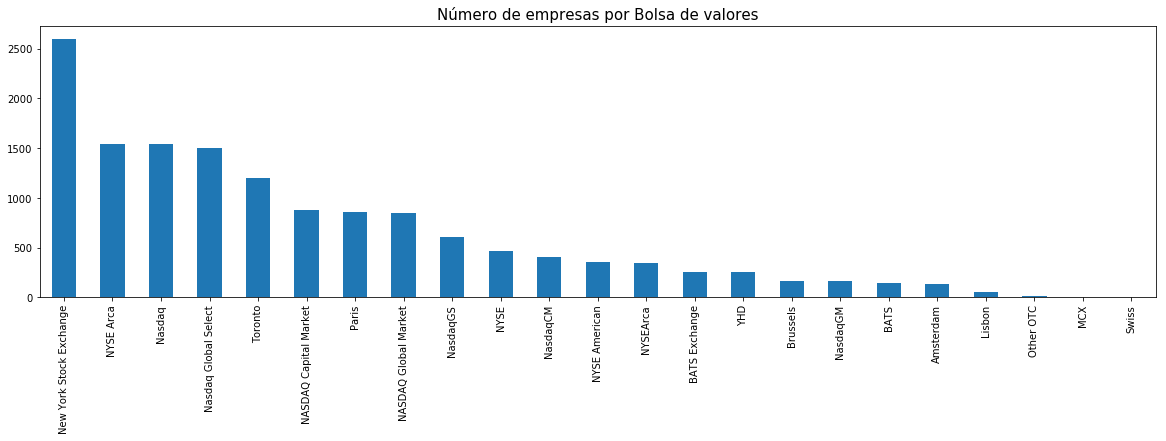

In [137]:
plt.figure(figsize=(20,5))
companies['exchange'].value_counts().plot.bar()
plt.title("Número de empresas por Bolsa de valores",size=15);

A empresa que escolhemos (a Tesla) tem como nome *Tesla Inc*, o preço da ação está valendo *USD 421.20* (quatrocentos e vinte e um dólares e vinte centavos) e está listada na *Nasdaq Global Select*.

In [113]:
pd.DataFrame(companies.loc['TSLA'])

,TSLA
name,Tesla Inc
price,421.2
exchange,Nasdaq Global Select


## Perfil da empresa

Veremos agora as informações gerais sobre a *Tesla*.

In [63]:
profile = fa.profile(ticker, api_key)

Podemos ver algumas informações, como:
    
1) O *beta* da empresa, que é um indicador que mostra a sensibilidade de uma ação em relação ao mercado. Para a *Tesla* o beta foi de 1.69465; isso significa que a ação da *Tesla*, agressiva, ou seja, ela tem um bom desempenho quando a situação do mercado e da economia está bem;

2) *volAvg* que é a volatilidade média da ação, cujo valor foi de 82056371;

3) O nome do *CEO* da *Tesla* que é o Elon Musk;

4) Data que ocorreu o IPO da empresa na bolsa de valores (2010-06-29).

In [64]:
profile

,0
symbol,TSLA
price,421.2
beta,1.69465
volAvg,82056371
mktCap,392477966000
lastDiv,0
range,44.856-502.49
changes,13.86
companyName,Tesla Inc
exchange,Nasdaq Global Select


## Informação da ação

Informações sobre o preço da ação no dia de hoje (28/09/2020).

In [65]:
quotes = fa.quote(ticker, api_key)

Temos o preço da ação no dia (*price*), baixa do dia (*dayLow*), alta do dia (*dayHigh*), alta do ano (*YearHigh*), baixa do ano (*yearLow*) e informações de *Volume*.

In [66]:
quotes

,0
symbol,TSLA
name,"Tesla, Inc."
price,421.2
changesPercentage,3.4
change,13.86
dayLow,415.55
dayHigh,428.08
yearHigh,502.49
yearLow,44.856
marketCap,3.92478e+11


Abaixo temos o preço das ações, o número de ações, a capitalização de mercado e o valor da empresa ao longo do tempo.

In [67]:
entreprise_value = fa.enterprise(ticker, api_key)

In [145]:
entreprise_value

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
symbol,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
stockPrice,128.162,61.754,69.164,50.126,38.24,40.72,36.568,7.504,5.914,4.802
numberOfShares,885000000,852625000,828790000,721060000,641010000,125000000,119000000,107000000,100000000,51000000
marketCapitalization,113423372655,5.2653e+10,5.73224e+10,3.61439e+10,2.45122e+10,5090000125,4351592119,802928000,591400000,2.44902e+08
minusCashAndCashEquivalents,6268000000,3685618000,3367914000,3393216000,1196908000,1906000000,846000000,202000000,255000000,100000000
addTotalDebt,11634000000,9403672000,9418389000,5978284000,2068378000,1877000000,599000000,411000000,271000000,72000000
enterpriseValue,118789372655,5.83711e+10,6.33729e+10,3.87289e+10,2.53837e+10,5061000125,4104592119,1011928000,607400000,2.16902e+08


In [149]:
entreprise_value2=entreprise_value[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
entreprise_value2.T
entreprise_value2=entreprise_value2.T

In [151]:
entreprise_value2

,symbol,stockPrice,numberOfShares,marketCapitalization,minusCashAndCashEquivalents,addTotalDebt,enterpriseValue
2010,TSLA,4.802,51000000,2.44902e+08,100000000,72000000,2.16902e+08
2011,TSLA,5.914,100000000,591400000,255000000,271000000,607400000
2012,TSLA,7.504,107000000,802928000,202000000,411000000,1011928000
2013,TSLA,36.568,119000000,4351592119,846000000,599000000,4104592119
2014,TSLA,40.72,125000000,5090000125,1906000000,1877000000,5061000125
2015,TSLA,38.24,641010000,2.45122e+10,1196908000,2068378000,2.53837e+10
2016,TSLA,50.126,721060000,3.61439e+10,3393216000,5978284000,3.87289e+10
2017,TSLA,69.164,828790000,5.73224e+10,3367914000,9418389000,6.33729e+10
2018,TSLA,61.754,852625000,5.2653e+10,3685618000,9403672000,5.83711e+10
2019,TSLA,128.162,885000000,113423372655,6268000000,11634000000,118789372655


Conforme os gráficos abaixo, todas as variavéis apresentam crescimento de 2010 a 2019.

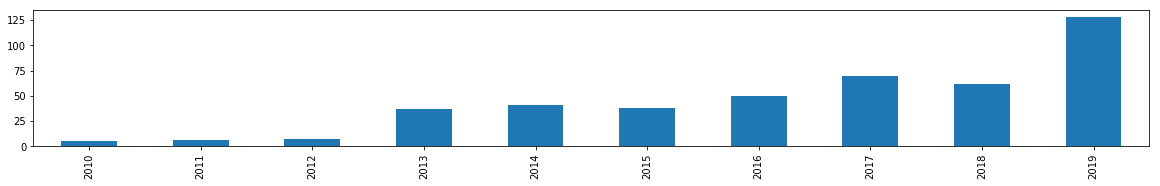

In [167]:
plt.figure(figsize=(20,2.5))
entreprise_value2['stockPrice'].plot.bar();

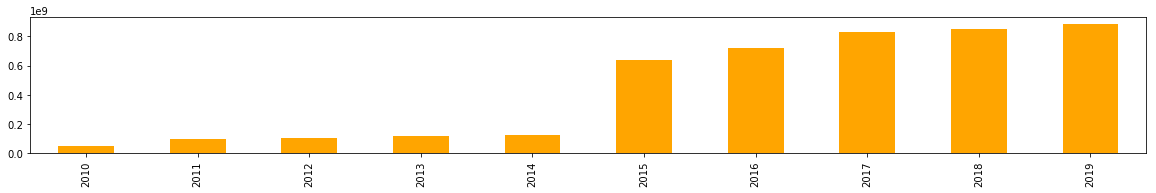

In [168]:
plt.figure(figsize=(20,2.5))
entreprise_value2['numberOfShares'].plot.bar(color='orange');

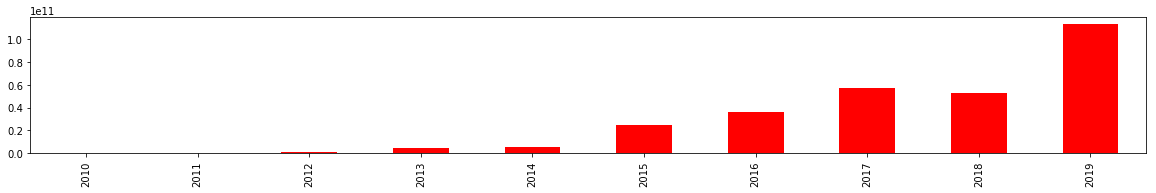

In [169]:
plt.figure(figsize=(20,2.5))
entreprise_value2['marketCapitalization'].plot.bar(color='red');

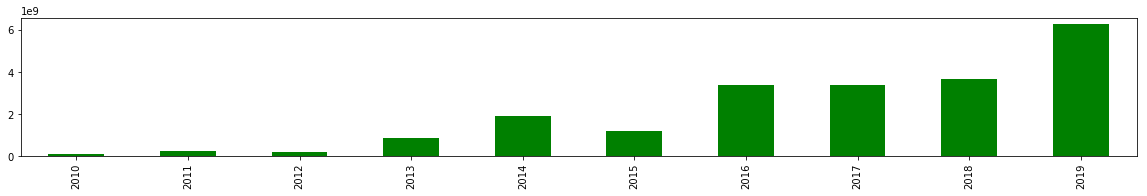

In [170]:
plt.figure(figsize=(20,2.55))
entreprise_value2['minusCashAndCashEquivalents'].plot.bar(color='green');

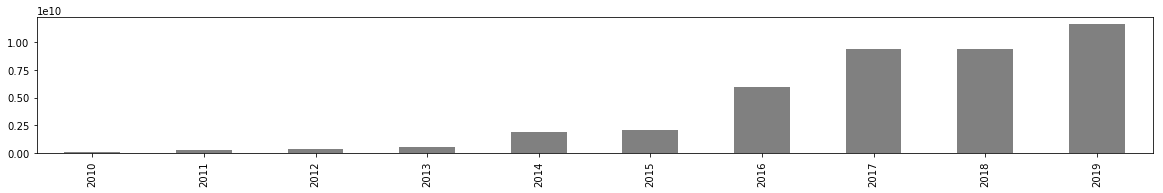

In [172]:
plt.figure(figsize=(20,2.5))
entreprise_value2['addTotalDebt'].plot.bar(color='gray');

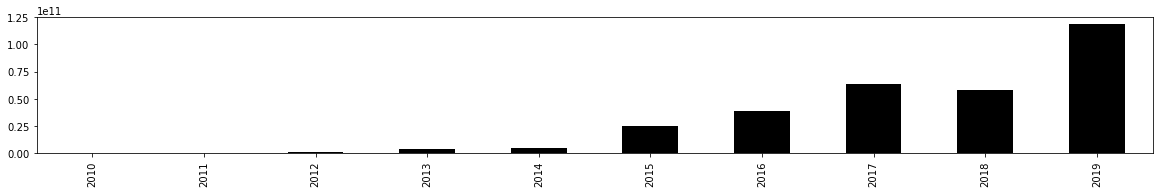

In [173]:
plt.figure(figsize=(20,2.5))
entreprise_value2['enterpriseValue'].plot.bar(color='black');

## Informações de compra 

Com base em índices específicos, fornece informações se a empresa é uma compra (forte), neutra ou uma venda (forte).

In [69]:
ratings = fa.rating(ticker, api_key)

A função *ratings* calcula 6 indicadores, que são :

1)  **P/B Ratio**, também conhecido como **P/VPA** (Preço sobre o Valor Patrimonial por Ação): mostra o quanto o mercado está disposto a pagar pelo patrimônio líquido da empresa;

2) **ROA** (*Return on Assets* ou Retorno sobre os ativos): representa a capacidade de uma empresa em gerar lucro com os ativos que possui; 

3) **DCF** (*Discounted cash flow* ou Fluxo de Caixa descontado): É uma estimativa do fluxo de caixa da empresa hoje com base em seus valores futuros projetados;

4) **P/E** ou P/L: Número de anos que leva para reaver o investimento aplicado na ação;

5) **ROE** : Lucro líquido dividido sobre o patrimônio líquido;

6) D/E (*Debt-to-equity ratio* ou dívida sobre patrimônio).

Vemos que os indicadores abaixo recomendam fortemente que as ações dessa empresas sejam **compradas**.

In [70]:
ratings

,score,recommendation
P/B,5,Strong Buy
ROA,3,Strong Buy
DCF,5,Strong Buy
P/E,3,Neutral
ROE,2,Sell
D/E,5,Neutral


## *Discounted cash flow* (Fluxo de caixa descontado)

Como falamos anteriormente, é uma estimativa do fluxo de caixa da empresa hoje com base em seus valores futuros projetados.
Abaixo obteremos esses valores de forma anual e trimestral.

In [174]:
dcf_annually = fa.discounted_cash_flow(ticker, api_key, period="annual")
dcf_quarterly = fa.discounted_cash_flow(ticker, api_key, period="quarter")

### Fluxo de caixa descontado anual

In [176]:
dcf_annually = dcf_annually[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]
dcf_annually

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
date,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-09-29
Stock Price,4.802,5.914,7.504,36.568,40.72,38.24,50.126,69.164,61.754,128.162,421.2
DCF,6.71066,8.45677,9.38468,43.6512,56.0221,47.5761,73.6554,89.4823,83.3674,163.574,456.612


Vemos que esse fluxo de caixa descontado é crescente.

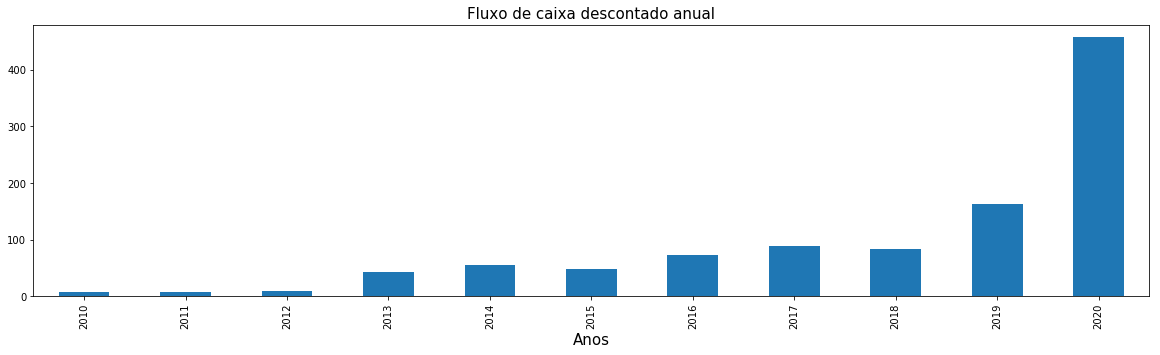

In [190]:
plt.figure(figsize=(20,5))
dcf_annually.T['DCF'].plot.bar()
plt.title("Fluxo de caixa descontado anual",size=15)
plt.xlabel("Anos",size=15);

In [198]:
dcf_quarterly=dcf_quarterly[['2010-06', '2010-09', '2010-12', '2011-03', '2011-06', '2011-09','2011-12', '2012-03', '2012-06', 
                             '2012-09', '2012-12', '2013-03', '2013-06', '2013-09', '2013-12', '2014-03', '2014-06', '2014-09',
                             '2014-12', '2015-03','2015-06', '2015-09', '2015-12', '2016-03', '2016-06', '2016-09', '2016-12',
                             '2017-03', '2017-06', '2017-09','2017-12', '2018-03', '2018-06', '2018-09', '2018-12', '2019-03',
                             '2019-06', '2019-09', '2019-12', '2020-03','2020-06', '2020-09']]

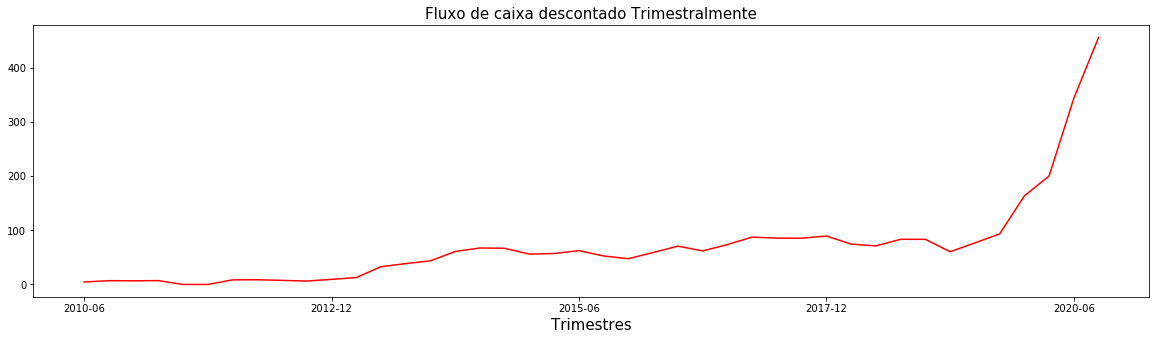

In [201]:
plt.figure(figsize=(20,5))
dcf_quarterly.T['DCF'].plot(color='red')
plt.xlabel('Trimestres',size=15)
plt.title('Fluxo de caixa descontado Trimestralmente',size=15);

## Balanços da *Tesla*

Agora geraremos um *dataframe* com uma demonstração de resultados completo longo do tempo (trimestral e anual).

In [74]:
balance_sheet_annually = fa.balance_sheet_statement(ticker, api_key, period="annual")
balance_sheet_quarterly = fa.balance_sheet_statement(ticker, api_key, period="quarter")

Demonstração de anual.

In [202]:
balance_sheet_annually.T

,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
2019,2020-02-13 00:00:00,2020-02-13 07:12:18,FY,6268000000,0,6268000000,1324000000,3552000000,959000000,12103000000,...,-6083000000,-72000000,-36000000,6618000000,34309000000,393000000,13419000000,7151000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018,2019-02-19 00:00:00,2019-02-19 06:10:16,FY,3685618000,0,3685618000,949022000,3113446000,558222000,8306308000,...,-5317832000,-16436000,-8.218e+06,4923243000,29739614000,421548000,11971371000,8285753000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2017,2018-02-23 00:00:00,2018-02-23 06:07:43,FY,3367914000,0,3367914000,515381000,2263537000,423688000,6570520000,...,-4974299000,66696000,33348000,4237242000,28655372000,456652000,10314938000,6947024000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2016,2017-03-01 00:00:00,2017-03-01 16:54:21,FY,3393216000,0,3393216000,499142000,2067454000,299984000,6259796000,...,-2997237000,-47480000,-23740000,4752911000,22664076000,506302000,7128431000,3735215000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2015,2016-02-24 00:00:00,2016-02-24 16:17:56,FY,1196908000,0,1196908000,168965000,1277838000,138295000,2782006000,...,-2322323000,-7.112e+06,-3.556e+06,1083704000,8067939000,45256000,2696305000,1499397000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2014,2015-02-26,2015-02-26 17:13:26,FY,1906000000,0,1906000000,227000000,954000000,93000000,3180000000,...,-1434000000,-293000000,0,912000000,5831000000,35894000,2488000000,582000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2013,2014-02-26,2014-02-26 16:02:51,FY,846000000,0,846000000,49000000,340000000,31000000,1266000000,...,-1140000000,-140000000,0,667000000,2417000000,0,607000000,-239000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2012,2013-03-07 00:00:00,2013-03-07 17:10:43,FY,202000000,0,202000000,27000000,269000000,27000000,525000000,...,-1066000000,-58000000,0,125000000,1114000000,0,467000000,265000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2011,2012-02-27 00:00:00,2012-02-27 17:17:24,FY,255000000,25000000,280000000,10000000,50000000,33000000,373000000,...,-669000000,-32000000,0,224000000,713000000,25000000,280000000,25000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2010,2011-03-03,2011-03-03 14:47:36,FY,100000000,0,100000000,7e+06,45000000,84000000,236000000,...,-415000000,-22000000,0,207000000,386000000,0,73000000,-27000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...


Demonstração trimentral.

In [203]:
balance_sheet_quarterly.T

,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
2020-06,2020-07-28 00:00:00,2020-07-28 06:03:48,Q2,8615000000,0,8615000000,1485000000,4018000000,1218000000,15336000000,...,-6000000000,-80000000,-40000000,9855000000,38135000000,0,14139000000,5524000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2020-03,2020-04-30 00:00:00,2020-04-30 06:26:18,Q1,8080000000,0,8080000000,1274000000,4494000000,1045000000,14893000000,...,-6104000000,-226000000,-113000000,9173000000,37250000000,0,13943000000,5863000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2019-12,2020-02-13,2020-02-13 07:12:18,Q4,6268000000,0,6268000000,1324000000,3552000000,959000000,12103000000,...,-6083000000,-72000000,-36000000,6618000000,34309000000,393000000,13419000000,7151000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2019-09,2019-10-29 00:00:00,2019-10-29 07:23:29,Q3,5338000000,0,5338000000,1128000000,3581000000,893000000,10940000000,...,-6188000000,-240000000,-120000000,6040000000,32795000000,398000000,13343000000,8005000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2019-06,2019-07-29,2019-07-29 06:21:00,Q2,4954740000,0,4954740000,1147100000,3382358000,697754000,10181952000,...,-6331639000,-11210000,-5.605e+06,5715393000,31872597000,400308000,13025486000,8070746000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2019-03,2019-04-29 00:00:00,2019-04-29 06:09:07,Q1,2198169000,0,2198169000,1046945000,3836850000,595858000,7677822000,...,-5923305000,-70038000,-35019000,4605596000,28912524000,413181000,11493661000,9295492000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018-12,2019-02-19,2019-02-19 06:10:16,Q4,3686000000,0,3686000000,949000000,3113000000,558000000,8306000000,...,-5318000000,-16000000,-8e+06,4923000000,29740000000,421548000,11971000000,8285000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018-09,2018-11-02 00:00:00,2018-11-01 20:38:56,Q3,2968000000,0,2968000000,1155000000,3314000000,483000000,7920000000,...,-5457000000,16000000,8e+06,4509000000,29263000000,422897000,11779000000,8811000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018-06,2018-08-06 00:00:00,2018-08-03 21:56:44,Q2,2236000000,0,2236000000,570000000,3325000000,569000000,6700000000,...,-5769000000,38000000,19000000,3906000000,27910000000,434841000,11617000000,9381000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018-03,2018-05-07 00:00:00,2018-05-04 21:46:25,Q1,2666000000,0,2666000000,653000000,2566000000,499000000,6384000000,...,-5051000000,166000000,83000000,4451000000,27271000000,449754000,10762000000,8096000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...


Abaixo outra forma de extrair os demonstrativos (anuais e trimestrais).

In [77]:
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")
income_statement_quarterly = fa.income_statement(ticker, api_key, period="quarter")

Demonstrativos anuais.

In [206]:
income_statement_annually.T

,fillingDate,acceptedDate,period,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
2019,2020-02-13 00:00:00,2020-02-13 07:12:18,FY,24578000000,20509000000,4069000000,0.165555,1343000000,2646000000,0,...,-0.027057,110000000,-862000000,-0.035072,-0.83006,-0.83006,885000000,885000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018,2019-02-19 00:00:00,2019-02-19 06:10:16,FY,21461268000,17419247000,4042021000,0.18834,1460370000,2834491000,0,...,-0.046817,57837000,-976091000,-0.045482,-1.04171,-1.04171,852625000,852625000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2017,2018-02-23 00:00:00,2018-02-23 06:07:43,FY,11758751000,9536264000,2222487000,0.189007,1378073000,2476500000,0,...,-0.187863,-691100000,-1961400000,-0.166803,-1.49465,-1.49465,828790000,828790000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2016,2017-03-01 00:00:00,2017-03-01 16:54:21,FY,7000132000,5400875000,1599257000,0.228461,834408000,1432189000,0,...,-0.106619,26698000,-674914000,-0.096414,-0.936,-0.936,721060000,721060000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2015,2016-02-24 00:00:00,2016-02-24 16:17:56,FY,4046025000,3122522000,923503000,0.228249,717900000,922232000,0,...,-0.216416,13039000,-888663000,-0.219639,-1.38635,-1.38635,641010000,641010000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2014,2015-02-26,2015-02-26 17:13:26,FY,3198000000,2317000000,882000000,0.275797,465000000,604000000,0,...,-0.089118,9e+06,-294000000,-0.091932,-2.36,-2.36,125000000,125000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2013,2014-02-26,2014-02-26 16:02:51,FY,2013000000,1557000000,456000000,0.226528,232000000,286000000,0,...,-0.035271,3e+06,-74000000,-0.036761,-0.62,-0.62,119000000,119000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2012,2013-03-07 00:00:00,2013-03-07 17:10:43,FY,413000000,383000000,30000000,0.072639,274000000,150000000,0,...,-0.958838,0,-396000000,-0.958838,-3.69,-3.69,107000000,107000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2011,2012-02-27 00:00:00,2012-02-27 17:17:24,FY,204000000,143000000,62000000,0.303922,209000000,104000000,0,...,-1.2451,0,-254000000,-1.2451,-2.53,-2.53,100000000,100000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2010,2011-03-03,2011-03-03 14:47:36,FY,117000000,85000000,32000000,0.273504,93000000,85000000,0,...,-1.31624,0,-154000000,-1.31624,-3.03,-3.03,51000000,51000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...


In [207]:
Demonstrativos trimestrais.

SyntaxError: invalid syntax (<ipython-input-207-61be4239511d>, line 1)

In [79]:
income_statement_quarterly.T

,2020-06,2020-03,2019-12,2019-09,2019-06,2019-03,2018-12,2018-09,2018-06,2018-03,...,2011-03,2010-12,2010-09,2010-06,2010-03,2009-12,2009-09,2009-06,2009-03,2008-12
fillingDate,2020-07-28 00:00:00,2020-04-30 00:00:00,2020-02-13,2019-10-29 00:00:00,2019-07-29,2019-04-29 00:00:00,2019-02-19,2018-11-02 00:00:00,2018-08-06 00:00:00,2018-05-07 00:00:00,...,2011-05-13 00:00:00,2011-03-03,2010-11-12 00:00:00,2010-08-13 00:00:00,None,None,None,None,None,None
acceptedDate,2020-07-28 06:03:48,2020-04-30 06:26:18,2020-02-13 07:12:18,2019-10-29 07:23:29,2019-07-29 06:21:00,2019-04-29 06:09:07,2019-02-19 06:10:16,2018-11-01 20:38:56,2018-08-03 21:56:44,2018-05-04 21:46:25,...,2011-05-13 17:01:50,2011-03-03 14:47:36,2010-11-12 17:21:21,2010-08-13 16:12:18,None,None,None,None,None,None
period,Q2,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,...,Q1,Q4,Q3,Q2,Q1,Q4,Q3,Q2,Q1,Q4
revenue,6036000000,5985000000,7384000000,6303000000,6349676000,4541464000,7225900000,6824400000,4002200000,3408800000,...,49000000,36300000,31200000,28400000,20800000,18600000,45500000,26900000,20900000,14200000
costOfRevenue,4769000000,4751000000,5993000000,5112000000,5428630000,3975721000,5783000000,5300700000,3383300000,2952200000,...,31000000,25000000,21900000,22100000,17000000,16800000,37800000,24800000,22900000,15300000
grossProfit,1267000000,1234000000,1391000000,1191000000,921046000,565743000,1442900000,1523700000,618900000,456500000,...,18000000,11300000,9300000,6300000,3900000,1800000,7700000,2100000,-2000000,-1100000
grossProfitRatio,0.209907,0.206182,0.18838,0.188958,0.145054,0.124573,0.199684,0.223272,0.15464,0.133918,...,0.367347,0.311295,0.298077,0.221831,0.1875,0.096774,0.169231,0.078067,-0.095694,-0.077465
researchAndDevelopmentExpenses,279000000,324000000,345000000,334000000,323898000,340174000,356300000,350800000,386100000,367100000,...,41200000,37600000,26700000,15400000,13300000,8100000,1300000,1900000,7900000,8100000
generalAndAdministrativeExpenses,661000000,627000000,699000000,596000000,647261000,703929000,667500000,729900000,750800000,686400000,...,24200000,25300000,20400000,22200000,16600000,16600000,10700000,8200000,6600000,9700000
sellingAndMarketingExpenses,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Demonstrativos de Fluxo de caixa

Também podemos extrair os demonstrativos de fluxos de caixa, assim como anteriormente, por ano e por trimestre.

In [80]:
cash_flow_statement_annually = fa.cash_flow_statement(ticker, api_key, period="annual")
cash_flow_statement_quarterly = fa.cash_flow_statement(ticker, api_key, period="quarter")

Demonstrativos de Fluxo de caixa por ano.

In [208]:
cash_flow_statement_annually.T

,fillingDate,acceptedDate,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
2019,2020-02-13 00:00:00,2020-02-13 07:12:18,FY,-775000000,2154000000,0,898000000,-349000000,-367000000,-429000000,...,1529000000,8000000,2506000000,6191618000,3685618000,2405000000,-1437000000,968000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018,2019-02-19 00:00:00,2019-02-19 06:10:16,FY,-1062582000,1901050000,0,749024000,57951000,-496732000,-1023264000,...,573755000,-22700000,311429000,3679343000,3367914000,2097802000,-2319516000,-221714000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2017,2018-02-23 00:00:00,2018-02-23 06:07:43,FY,-2240578000,1636003000,0,466760000,-496603000,-24635000,-178850000,...,4414864000,39726000,198059000,3591275000,3393216000,-60654000,-4081354000,-4142008000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2016,2017-03-01 00:00:00,2017-03-01 16:54:21,FY,-773046000,947099000,0,334225000,-693861000,-216565000,65520000,...,3743976000,-6553000,2532509000,3729417000,1196908000,-123829000,-1440471000,-1564300000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2015,2016-02-24 00:00:00,2016-02-24 16:17:56,FY,-888663000,422590000,0,197999000,-493289000,46267000,44940000,...,1523523000,-34278000,-708805000,1197195000,1906000000,-524499000,-1634850000,-2159349000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2014,2015-02-26,2015-02-26 17:13:26,FY,-294000000,231900000,0,156496000,-256800000,-183658000,15609000,...,2143100000,-35500000,1059800000,1905800000,846000000,-57300000,-969900000,-1027200000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2013,2014-02-26,2014-02-26 16:02:51,FY,-74000000,106100000,0,80737000,149000000,-21917000,8918000,...,635400000,-6800000,644000000,846000000,202000000,264800000,-264200000,600000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2012,2013-03-07 00:00:00,2013-03-07 17:10:43,FY,-396200000,28800000,0,50145000,44900000,-17303000,4929000,...,419600000,-2300000,-53400000,201600000,255000000,-263800000,-239200000,-503000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2011,2012-02-27 00:00:00,2012-02-27 17:17:24,FY,-254400000,16900000,0,29419000,75600000,-2829000,1828000,...,446000000,0,155700000,255700000,100000000,-128000000,-184200000,-312200000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2010,2011-03-03,2011-03-03 14:47:36,FY,-154300000,10600000,0,21156000,-11200000,-3222000,951000,...,338000000,0,29900000,99900000,70000000,-127800000,-40200000,-168000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...


Demonstrativos de Fluxo de caixa por trimestre.

In [209]:
cash_flow_statement_quarterly.T

,fillingDate,acceptedDate,period,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
2020-06,2020-07-28 00:00:00,2020-07-28 06:03:48,Q2,129000000,567000000,0,347000000,-246000000,-222000000,446000000,...,123000000,38000000,559000000,8639000000,8080000000,964000000,-566000000,398000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2020-03,2020-04-30 00:00:00,2020-04-30 06:26:18,Q1,68000000,553000000,0,211000000,-1447000000,-14000000,-981000000,...,2708000000,-24000000,1764000000,8032000000,6268000000,-440000000,-481000000,-921000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2019-12,2020-02-13,2020-02-13 07:12:18,Q4,132000000,577000000,0,281000000,231000000,-217000000,56000000,...,-79000000,14000000,957000000,6295000000,5338000000,1425000000,-449000000,976000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2019-09,2019-10-29 00:00:00,2019-10-29 07:23:29,Q3,1.49907e+08,5.30851e+08,0,198759000,-1.91047e+08,18312000,-132572000,...,1.18178e+08,-11471000,377095000,5331835000,4954740000,756000000,-409600000,346400000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2019-06,2019-07-29,2019-07-29 06:21:00,Q2,-3.89262e+08,5.78572e+08,0,209863000,287148000,-68672000,456724000,...,2142841000,593000,2765495000,4963664000,2198169000,863606000,-273207000,590399000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2019-03,2019-04-29 00:00:00,2019-04-29 06:09:07,Q1,-667645000,467577000,0,208378000,-676101000,-99640000,-809152000,...,-653019000,4.878e+06,-1593590000,2092410000,3686000000,-639606000,-305193000,-944799000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018-12,2019-02-19,2019-02-19 06:10:16,Q4,2.101e+08,4.968e+08,0,205313000,199100000,189371000,87347000,...,-1.123e+08,-3.8e+06,753400000,3721400000,2968000000,1234600000,-3.539e+08,880700000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018-09,2018-11-02 00:00:00,2018-11-01 20:38:56,Q3,2.546e+08,5.028e+08,0,204728000,3.513e+08,-587594000,-55055000,...,-8.42e+07,-6.4e+06,739700000,2975700000,2236000000,1391200000,-5.597e+08,8.315e+08,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018-06,2018-08-06 00:00:00,2018-08-03 21:56:44,Q2,-7.427e+08,485300000,0,197344000,-167000000,70633000,-733475000,...,3.986e+08,-22600000,-4.364e+08,2229600000,2666000000,-1.296e+08,-6.773e+08,-8.069e+08,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...
2018-03,2018-05-07 00:00:00,2018-05-04 21:46:25,Q1,-784600000,416200000,0,141639000,-325400000,-169142000,-322081000,...,371700000,10100000,-745300000,2622700000,3368000000,-398400000,-728600000,-1127000000,https://www.sec.gov/Archives/edgar/data/131860...,https://www.sec.gov/Archives/edgar/data/131860...


## Métricas de análise

Vamos gerar uma lista com as principais métricas (no total 57 métricas) de uma empresa ao longo do tempo (anual e trimestral). Isso inclui, entre outras coisas, retorno sobre o patrimônio líquido (ROE), capital de giro, índice atual e dívida sobre ativos.

In [83]:
key_metrics_annually = fa.key_metrics(ticker, api_key, period="annual")
key_metrics_quarterly = fa.key_metrics(ticker, api_key, period="quarter")

Métricas por ano.

In [210]:
key_metrics_annually.T

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2019,27.771751,-0.974011,2.717514,1.093785,7.082486,7.477966,38.160452,7.477966,13.919774,1.134234e+11,...,3.587726e+09,3.332723e+09,19.662300,67.112731,63.215174,18.563444,5.438610,5.773930,-0.130251,-1.623729
2018,25.170817,-1.144807,2.460404,-0.260037,4.322672,5.774218,34.468803,5.774218,11.806765,5.265301e+10,...,3.404451e+09,3.113446e+09,16.140380,71.336299,65.238629,22.614089,5.116610,5.594845,-0.198262,-2.720441
2017,14.187853,-2.366583,-0.073184,-4.997657,4.063652,5.112564,34.066088,5.112564,11.932634,5.732243e+10,...,2.897350e+09,2.688492e+09,15.997793,91.486692,86.636759,22.815647,3.989651,4.212992,-0.462895,-4.924473
2016,9.708113,-0.936003,-0.171732,-2.169445,4.705872,6.591561,30.909953,6.591561,8.566685,3.614385e+10,...,2.632396e+09,2.590450e+09,26.026199,125.724899,139.721936,14.024330,2.903164,2.612331,-0.142000,-1.997713
2015,6.311953,-1.386348,-0.818238,-3.368667,1.867222,1.690619,12.586292,1.690619,3.412160,2.451222e+10,...,2.160300e+09,2.195642e+09,15.242670,107.091005,149.369923,23.945936,3.408316,2.443598,-0.820024,-2.550428
2014,25.584000,-2.352000,-0.458400,-8.217600,15.248000,7.296000,46.648000,7.296000,15.823088,5.090000e+09,...,2.091226e+09,2.033723e+09,25.908380,122.559344,150.284851,14.088106,2.978149,2.428721,-0.322368,-7.759200
2013,16.915966,-0.621849,2.225210,0.005042,7.109244,5.605042,20.310924,5.605042,5.310370,4.351592e+09,...,1.854226e+09,1.726723e+09,8.884749,71.265254,79.704560,41.081633,5.121711,4.579412,-0.110945,-2.220168
2012,3.859813,-3.700935,-2.465421,-4.700935,1.887850,1.168224,10.411215,1.168224,3.843495,8.029280e+08,...,1.853726e+09,1.691223e+09,23.861985,288.759791,256.357702,15.296296,1.264026,1.423792,-3.168000,-2.235514
2011,2.040000,-2.540000,-1.280000,-3.122000,2.550000,2.240000,7.130000,2.240000,2.710430,5.914000e+08,...,1.730226e+09,1.581723e+09,17.892157,142.937063,127.622378,20.400000,2.553571,2.860000,-1.133929,-1.842000
2010,2.294118,-3.019608,-2.505882,-3.294118,1.960784,4.058824,7.568627,4.058824,1.431216,2.449020e+08,...,1.716726e+09,1.579223e+09,21.837607,124.529412,193.235294,16.714286,2.931034,1.888889,-0.743961,-0.788235


Métricas por trimestre.

In [211]:
key_metrics_quarterly.T

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2020-06,5.831884,0.100483,0.931401,0.384541,8.323671,9.521739,36.354589,9.521739,10.270531,2.235207e+11,...,3.804000e+09,4.256000e+09,22.142147,68.655903,75.827217,4.064646,1.310885,1.186909,0.010553,-0.546860
2020-03,6.015075,0.016080,-0.442211,-0.925628,8.120603,9.219095,36.918593,9.219095,10.949749,1.042760e+11,...,3.970000e+09,4.494000e+09,19.157895,75.205220,85.131551,4.697802,1.196725,1.057187,0.001744,-0.483417
2019-12,8.204444,0.116667,1.583333,1.084444,6.964444,7.353333,37.524444,7.353333,13.115556,7.529940e+10,...,3.870500e+09,4.023000e+09,16.137595,56.631070,53.342233,5.577039,1.589234,1.687218,0.015866,-0.498889
2019-09,6.851087,0.155435,0.821739,0.376522,5.802174,6.565217,35.063043,6.565217,12.498443,4.432008e+10,...,3.719000e+09,4.037500e+09,16.106616,61.056338,63.045775,5.587766,1.474048,1.427534,0.023675,-0.445217
2019-06,7.188828,-0.462298,0.977737,0.668424,5.609542,6.470720,35.540394,6.470720,12.913809,4.013049e+10,...,3.551794e+09,3.938179e+09,16.258940,51.951013,56.075330,5.535416,1.732401,1.604984,-0.071445,-0.309313
2019-03,26.252906,-4.058842,-3.697380,-5.461613,12.706987,26.623635,165.124048,26.623635,57.491534,1.000499e+10,...,3.609414e+09,4.165425e+09,20.747726,73.545007,86.856321,4.337825,1.223740,1.036194,-0.152453,-1.764234
2018-12,42.011047,0.811047,7.177907,5.120349,21.430233,28.622093,170.872093,28.622093,55.690250,1.144832e+10,...,3.687000e+09,3.803500e+09,11.819981,52.975964,48.447173,7.614226,1.698884,1.857694,0.028336,-2.057558
2018-09,38.296296,1.748036,7.806958,4.666105,16.655443,25.303030,162.216611,25.303030,55.264983,1.107335e+10,...,3.783500e+09,3.904000e+09,15.232108,61.073066,56.268040,5.908571,1.473645,1.599487,0.069084,-3.140853
2018-06,23.542353,-4.220588,-0.762353,-4.746471,13.152941,22.976471,162.035294,22.976471,56.921071,1.166030e+10,...,3.500000e+09,3.909500e+09,12.817950,80.601779,88.449147,7.021404,1.116601,1.017534,-0.183692,-3.984118
2018-03,20.158486,-4.196334,-2.356002,-6.664695,15.765819,26.321703,158.864577,26.321703,52.711685,8.538873e+09,...,3.286500e+09,3.530000e+09,17.240671,79.354380,78.226407,5.220214,1.134153,1.150507,-0.159425,-4.308693


## Índices

Aqui a biblioteca gera índices detalhados (no total de 57 índices) de uma empresa ao longo do tempo (anual e trimestral).

In [86]:
financial_ratios_annually = fa.financial_ratios(ticker, api_key, period="annual")
financial_ratios_quarterly = fa.financial_ratios(ticker, api_key, period="quarter")

Índices por ano.

In [212]:
financial_ratios_annually.T

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
2019,1.134621,0.711728,0.587607,19.662300,63.215174,82.877473,67.112731,15.764742,0.165555,-0.002807,...,4.614833,-131.581639,117.172906,47.161486,47.161486,119.302145,4.614833,NaN,56.918722,17.138618
2018,0.831285,0.463829,0.368852,16.140380,65.238629,81.379009,71.336299,10.042710,0.188340,-0.018082,...,2.453397,-53.942723,-237.481647,25.099130,25.099130,47.119494,2.453397,NaN,35.465235,10.694781
2017,0.856131,0.505989,0.438835,15.997793,86.636759,102.634552,91.486692,11.147860,0.189007,-0.138798,...,4.874874,-29.225264,-13.839286,-945.072582,-945.072582,24.814906,4.874874,NaN,-116.229807,13.528241
2016,1.074273,0.667986,0.582326,26.026199,139.721936,165.748135,125.724899,40.023236,0.228461,-0.095332,...,5.163310,-53.553272,-23.105448,-291.885203,-291.885203,39.560986,5.163310,NaN,77.816889,7.604572
2015,0.989673,0.485897,0.425789,15.242670,149.369923,164.612593,107.091005,57.521588,0.228249,-0.177119,...,6.058347,-27.583261,-11.351673,-46.734548,-46.734548,18.114240,6.058347,NaN,-75.957465,22.618929
2014,1.509255,1.012340,0.904604,25.908380,150.284851,176.193231,122.559344,53.633887,0.275797,-0.058474,...,1.591620,-17.312926,-4.955218,-88.830718,-88.830718,2.217125,1.591620,NaN,105.909683,5.581140
2013,1.875556,1.325926,1.253333,8.884749,79.704560,88.589309,71.265254,17.324055,0.226528,-0.030303,...,2.161745,-58.805299,7252.653532,16.433505,16.433505,7.169240,2.161745,NaN,60.331483,6.524126
2012,0.974026,0.424861,0.374768,23.861985,256.357702,280.219688,288.759791,-8.540103,0.072639,-0.953995,...,1.944136,-2.027596,-1.596278,-3.043700,-3.043700,0.222267,1.944136,NaN,-2.757703,6.423424
2011,1.952880,1.518325,1.335079,17.892157,127.622378,145.514534,142.937063,2.577472,0.303922,-1.230392,...,2.899020,-2.328346,-1.894299,-4.620312,-4.620312,0.238538,2.899020,NaN,-2.562253,2.640179
2010,2.744186,1.244186,1.162791,21.837607,193.235294,215.072901,124.529412,90.543489,0.273504,-1.256410,...,2.093179,-1.590273,-1.457750,-1.916291,-1.916291,0.083091,2.093179,NaN,-1.523103,1.183101


Índices por trimestre.

In [213]:
financial_ratios_quarterly.T

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,grossProfitMargin,operatingProfitMargin,...,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue
2020-06,1.249878,0.823146,0.702119,89.798708,75.827217,97.969365,68.655903,29.313462,0.209907,0.054175,...,37.031258,2149.237271,561.609739,231.867921,231.867921,139028.785984,37.031258,NaN,261.445100,22.680941
2020-03,1.242533,0.780410,0.674120,77.695906,85.131551,104.289446,75.205220,29.084226,0.206182,0.047285,...,17.422891,6517.250187,-113.220416,-236.990916,-236.990916,405291.495977,17.422891,NaN,144.489193,11.367710
2019-12,1.134621,0.711728,0.587607,65.446912,53.342233,69.479827,56.631070,12.848758,0.188380,0.048619,...,10.197644,717.137143,77.151025,52.841684,52.841684,40338.964286,10.197644,NaN,90.229754,11.377969
2019-09,1.078257,0.637295,0.526119,65.321276,63.045775,79.152391,61.056338,18.096053,0.188958,0.041409,...,7.031585,309.930629,127.944804,58.624444,58.624444,17821.011189,7.031585,NaN,56.803705,7.337762
2019-06,1.061862,0.636353,0.516723,65.939034,56.075330,72.334270,51.951013,20.383257,0.145054,-0.026373,...,6.320084,-98.278584,67.971808,46.468514,46.468514,-5425.407818,6.320084,NaN,128.329614,7.021475
2019-03,0.830681,0.351096,0.237825,84.143555,86.856321,107.604047,73.545007,34.059040,0.124573,-0.114904,...,2.203032,-14.249385,-10.589545,-15.642429,-15.642429,-154.061674,2.203032,NaN,-324.435253,2.172355
2018-12,0.831265,0.463871,0.368895,47.936589,48.447173,60.267154,52.975964,7.291190,0.199684,0.057225,...,1.584345,82.066808,12.999114,9.272898,9.272898,882.218181,1.584345,NaN,20.609732,2.325476
2018-09,0.810230,0.421790,0.303632,61.774662,56.268040,71.500148,61.073066,10.427083,0.223272,0.061075,...,1.622611,35.548468,13.317315,7.959566,7.959566,395.921064,1.622611,NaN,17.670206,2.455832
2018-06,0.732961,0.306969,0.244612,51.983909,88.449147,101.267097,80.601779,20.665318,0.154640,-0.155265,...,2.913472,-16.251288,-14.450737,-89.971445,-89.971445,-172.669938,2.913472,NaN,-344.828641,2.985228
2018-03,0.738035,0.383699,0.308208,69.920500,78.226407,95.467079,79.354380,16.112699,0.133918,-0.175135,...,2.504950,-12.033361,-7.576640,-21.432915,-21.432915,-127.177588,2.504950,NaN,-105.869438,1.918417


## Crescimento

Aqui será gerado um *dataframe* com o crescimento de vários itens e índices das demonstrações financeiras ao longo do tempo (anual e trimestral). Estes são, entre outras coisas, crescimento da receita (3, 5 e 10 anos), crescimento do estoque e crescimento do fluxo de caixa operacional (3, 5 e 10 anos).

In [89]:
growth_annually = fa.financial_statement_growth(ticker, api_key, period="annual")
growth_quarterly = fa.financial_statement_growth(ticker, api_key, period="quarter")

Por ano.

In [215]:
growth_annually.T

,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,epsdilutedGrowth,weightedAverageSharesGrowth,weightedAverageSharesDilutedGrowth,dividendsperShareGrowth,...,tenYDividendperShareGrowthPerShare,fiveYDividendperShareGrowthPerShare,threeYDividendperShareGrowthPerShare,receivablesGrowth,inventoryGrowth,assetGrowth,bookValueperShareGrowth,debtGrowth,rdexpenseGrowth,sgaexpensesGrowth
2019,0.145226,0.006675,0.822198,0.822198,0.116886,0.203176,0.203176,0.037971,0.037971,0.0,...,0.0,0.0,0.0,0.395120,0.140858,0.153646,0.0,0.120924,-0.080370,-0.066499
2018,0.825132,0.818693,0.762223,0.762223,0.502350,0.303041,0.303041,0.028759,0.028759,0.0,...,0.0,0.0,0.0,0.841399,0.375478,0.037837,0.0,0.160586,0.059719,0.144555
2017,0.679790,0.389700,-1.445659,-1.445659,-1.906148,-0.596848,-0.596848,0.149405,0.149405,0.0,...,0.0,0.0,0.0,0.032534,0.094843,0.264352,0.0,0.447014,0.651558,0.729171
2016,0.730126,0.731729,0.068779,0.068779,0.240529,0.324846,0.324846,0.124881,0.124881,0.0,...,0.0,0.0,0.0,1.954115,0.617931,1.809153,0.0,1.643778,0.162290,0.552960
2015,0.265174,0.047056,-2.832241,-2.832241,-2.022663,0.412564,0.412564,4.128080,4.128080,0.0,...,0.0,0.0,0.0,-0.255661,0.339453,0.383629,0.0,0.083724,0.543871,0.526874
2014,0.588674,0.934211,-2.065574,-2.065574,-2.972973,-2.806452,-2.806452,0.050420,0.050420,0.0,...,0.0,0.0,0.0,3.632653,1.805882,1.412495,0.0,3.098847,1.004310,1.111888
2013,3.874092,14.200000,0.845178,0.845178,0.813131,0.831978,0.831978,0.112150,0.112150,0.0,...,0.0,0.0,0.0,0.814815,0.263941,1.169659,0.0,0.299786,-0.153285,0.906667
2012,1.024510,-0.516129,-0.569721,-0.569721,-0.559055,-0.458498,-0.458498,0.070000,0.070000,0.0,...,0.0,0.0,0.0,1.700000,4.380000,0.562412,0.0,0.667857,0.311005,0.442308
2011,0.743590,0.937500,-0.707483,-0.707483,-0.649351,0.165017,0.165017,0.960784,0.960784,0.0,...,0.0,0.0,0.0,0.428571,0.111111,0.847150,0.0,2.835616,1.247312,0.223529
2010,0.044643,1.909091,-1.826923,-1.826923,-1.750000,0.612036,0.612036,6.285714,6.285714,0.0,...,0.0,0.0,0.0,1.333333,0.956522,1.969231,0.0,23.333333,3.894737,1.023810


Por trimestre.

In [216]:
growth_quarterly.T

,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,epsdilutedGrowth,weightedAverageSharesGrowth,weightedAverageSharesDilutedGrowth,dividendsperShareGrowth,...,tenYDividendperShareGrowthPerShare,fiveYDividendperShareGrowthPerShare,threeYDividendperShareGrowthPerShare,receivablesGrowth,inventoryGrowth,assetGrowth,bookValueperShareGrowth,debtGrowth,rdexpenseGrowth,sgaexpensesGrowth
2020-06,0.008521,0.026742,0.155477,0.155477,5.500000,5.248756,5.248756,0.040201,0.040201,0.0,...,0.0,0.0,0.0,0.165620,-0.105919,0.023758,0.0,0.014057,-0.138889,0.054226
2020-03,-0.189464,-0.112868,-0.211699,-0.211699,-0.847619,-0.849085,-0.849085,0.105556,0.105556,0.0,...,0.0,0.0,0.0,-0.037764,0.265203,0.085721,0.0,0.039049,-0.060870,-0.103004
2019-12,0.171506,0.167926,0.375479,0.375479,-0.265734,-0.314482,-0.314482,-0.021739,-0.021739,0.0,...,0.0,0.0,0.0,0.173759,-0.008098,0.046166,0.0,0.005696,0.032934,0.172819
2019-09,-0.007351,0.293095,2.558600,2.558600,1.350204,1.455326,1.455326,0.041584,0.041584,0.0,...,0.0,0.0,0.0,-0.016651,0.058729,0.028940,0.0,0.024376,0.031189,-0.079197
2019-06,0.398156,0.628029,0.679095,0.679095,0.418439,0.912371,0.912371,4.105932,4.105932,0.0,...,0.0,0.0,0.0,0.095664,-0.118454,0.102380,0.0,0.133276,-0.047846,-0.080502
2019-03,-0.371502,-0.607913,-2.261985,-2.261985,-6.033226,-5.637500,-5.637500,0.005750,0.005750,0.0,...,0.0,0.0,0.0,0.103209,0.232525,-0.027824,0.0,-0.039875,-0.045260,0.054575
2018-12,0.058833,-0.053029,-0.007917,-0.007917,-0.552167,-0.555556,-0.555556,-0.034792,-0.034792,0.0,...,0.0,0.0,0.0,-0.178355,-0.060652,0.016300,0.0,0.016300,0.015678,-0.085491
2018-09,0.705162,1.461949,1.670743,1.670743,1.434146,1.493473,1.493473,0.048235,0.048235,0.0,...,0.0,0.0,0.0,1.026316,-0.003308,0.048477,0.0,0.013945,-0.091427,-0.027837
2018-06,0.174079,0.355750,-0.040871,-0.040871,-0.011133,0.085919,0.085919,0.005322,0.005322,0.0,...,0.0,0.0,0.0,-0.127106,0.295791,0.023431,0.0,0.079446,0.051757,0.093823
2018-03,0.036677,0.040337,0.001839,0.001839,-0.050637,-15.964286,-15.964286,0.004753,0.004753,0.0,...,0.0,0.0,0.0,0.267961,0.133392,-0.048299,0.0,0.043335,0.035251,0.006009


## Preço da ação

Aqui vamos ver os preços de alta (*high*), abertura (*open*), fechamento (*close*), baixa (*low*), volume e fechamento ajustado (*adjclose*).

In [92]:
stock_data = fa.stock_data(ticker, period="ytd", interval="1d")

Base do preço da ação da *Tesla* diária de Janeiro de 2020 até setembro de 2020.

In [93]:
stock_data

,high,open,close,low,volume,adjclose
2020-01-02,86.139999,84.900002,86.052002,84.342003,47660500,86.052002
2020-01-03,90.800003,88.099998,88.601997,87.384003,88892500,88.601997
2020-01-06,90.311996,88.094002,90.307999,88.000000,50665000,90.307999
2020-01-07,94.325996,92.279999,93.811996,90.671997,89410500,93.811996
2020-01-08,99.697998,94.739998,98.428001,93.646004,155721500,98.428001
...,...,...,...,...,...,...
2020-09-22,437.760010,429.600006,424.230011,417.600006,79580800,424.230011
2020-09-23,412.149994,405.160004,380.359985,375.880005,95074200,380.359985
2020-09-24,399.500000,363.799988,387.790009,351.299988,96561100,387.790009
2020-09-25,408.730011,393.470001,407.339996,391.299988,67068400,407.339996


Também podemos detalhar essas informações sobre os preços dessa ação e definir outro intervalo de tempo. Abaixo escolhemos de 2000 até 2020, mas a série só inicia a partir de 2010, que foi o ano em que as ações foram lançadas na bolsa de valores.

In [94]:
stock_data_detailed = fa.stock_data_detailed(ticker, api_key, begin="2000-01-01", end="2020-01-01")

In [218]:
stock_data_detailed = stock_data_detailed.reindex(index=stock_data_detailed.index[::-1])

In [219]:
stock_data_detailed

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
2010-06-29,3.8,5,3.508,4.778,4.778,9.38315e+07,9.38315e+07,0.978,25.737,4.42867,"June 29, 10",0.25737
2010-06-30,5.158,6.084,4.66,4.766,4.766,8.59355e+07,8.59355e+07,-0.392,-7.6,5.17,"June 30, 10",-0.076
2010-07-01,5,5.184,4.054,4.392,4.392,4.1094e+07,4.1094e+07,-0.608,-12.16,4.54333,"July 01, 10",-0.1216
2010-07-02,4.6,4.62,3.742,3.84,3.84,2.5699e+07,2.5699e+07,-0.76,-16.522,4.06733,"July 02, 10",-0.16522
2010-07-06,4,4,3.166,3.222,3.222,3.43345e+07,3.43345e+07,-0.778,-19.45,3.46267,"July 06, 10",-0.1945
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,83.672,85.094,82.538,85.05,85.05,4.02735e+07,4.02735e+07,1.37801,1.647,84.2273,"December 24, 19",0.01647
2019-12-26,85.582,86.696,85.27,86.188,86.188,5.31695e+07,5.31695e+07,0.606,0.708,86.0513,"December 26, 19",0.00708
2019-12-27,87,87.062,85.222,86.076,86.076,4.97285e+07,4.97285e+07,-0.924,-1.062,86.12,"December 27, 19",-0.01062
2019-12-30,85.758,85.8,81.852,82.94,82.94,6.2932e+07,6.2932e+07,-2.818,-3.286,83.5307,"December 30, 19",-0.03286


Vamos plotar essas séries abaixo e observar seu comportamento ao longo do tempo.

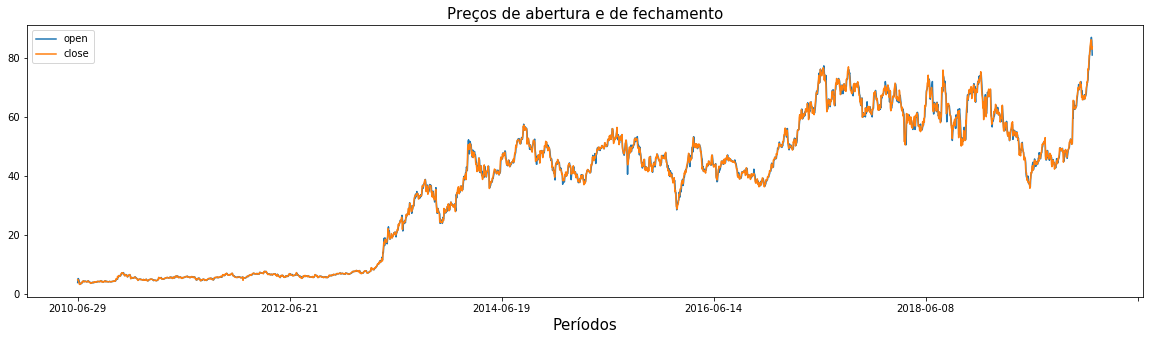

In [228]:
stock_data_detailed[['open','close']].plot(figsize=(20,5));
plt.xlabel("Períodos",size=15)
plt.title("Preços de abertura e de fechamento",size=15)
plt.show()

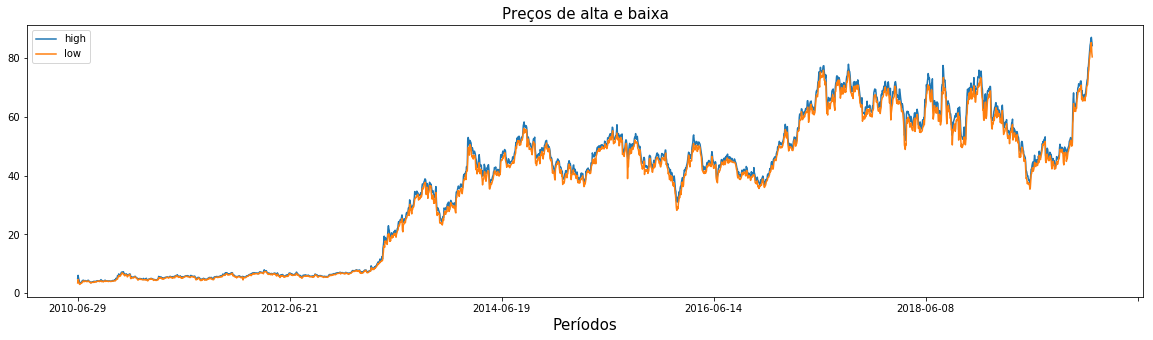

In [229]:
stock_data_detailed[['high','low']].plot(figsize=(20,5));
plt.xlabel("Períodos",size=15)
plt.title("Preços de alta e baixa",size=15)
plt.show()

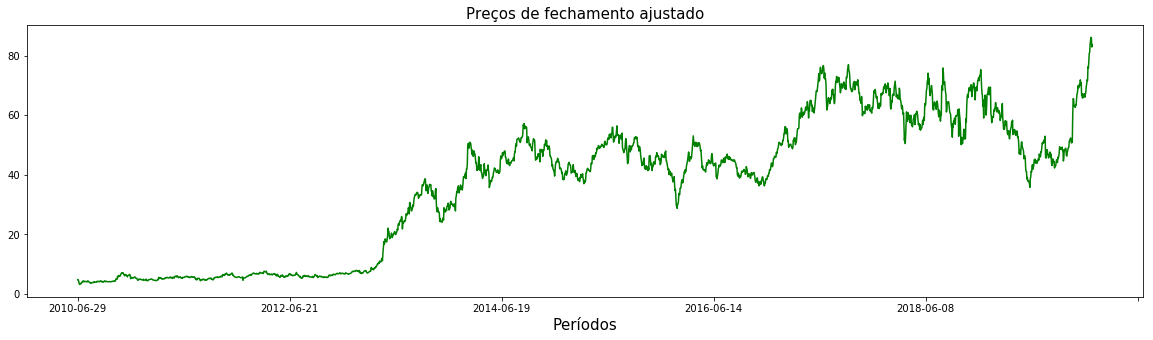

In [234]:
stock_data_detailed['adjClose'].plot(figsize=(20,5),color='green');
plt.xlabel("Períodos",size=15)
plt.title("Preços de fechamento ajustado",size=15)
plt.show()

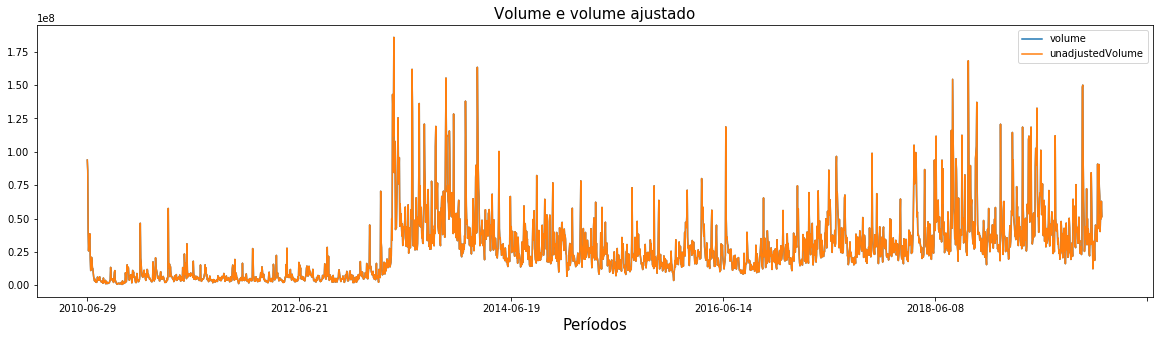

In [238]:
stock_data_detailed[['volume','unadjustedVolume']].plot(figsize=(20,5));
plt.xlabel("Períodos",size=15)
plt.title("Volume e volume ajustado",size=15)
plt.show()

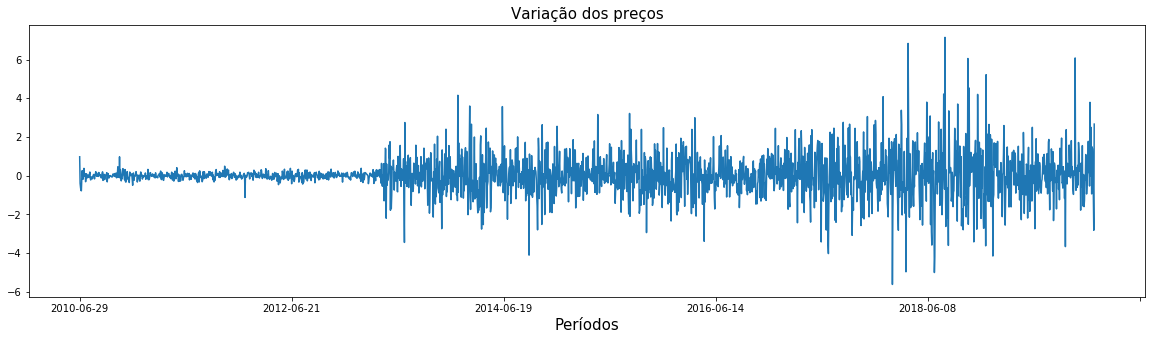

In [240]:
stock_data_detailed['change'].plot(figsize=(20,5));
plt.xlabel("Períodos",size=15)
plt.title("Variação dos preços",size=15)
plt.show()

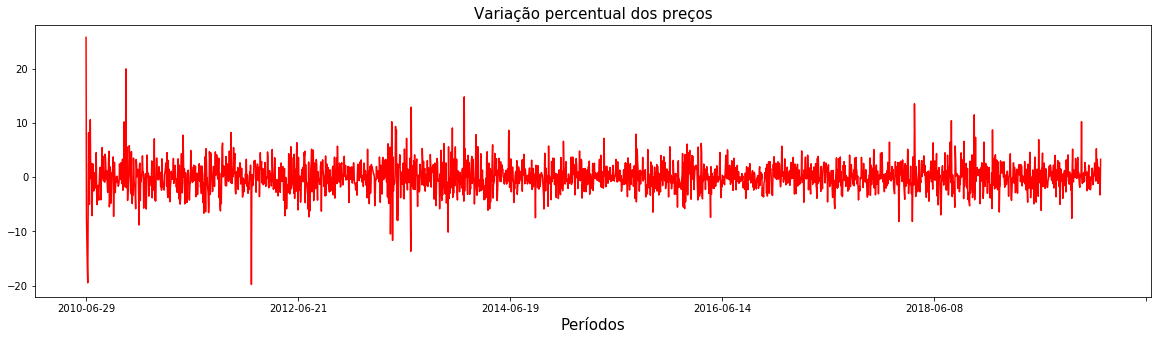

In [242]:
stock_data_detailed['changePercent'].plot(figsize=(20,5),color='red');
plt.xlabel("Períodos",size=15)
plt.title("Variação percentual dos preços",size=15)
plt.show()

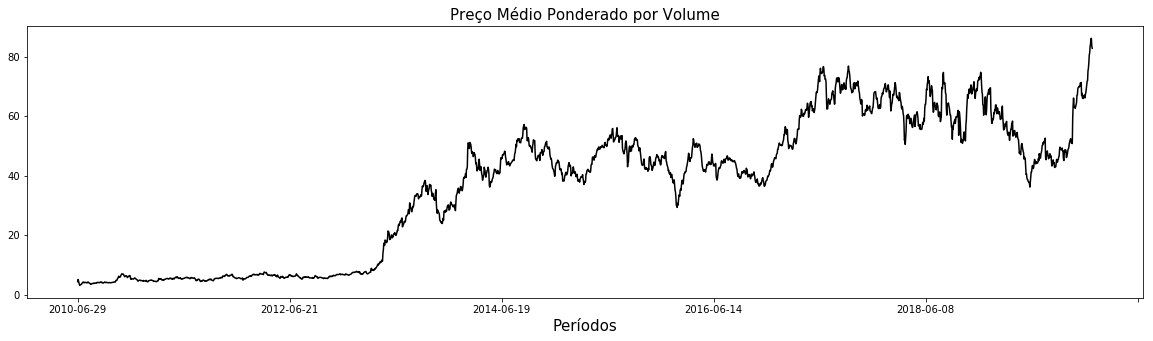

In [245]:
stock_data_detailed['vwap'].plot(figsize=(20,5),color='black');
plt.xlabel("Períodos",size=15)
plt.title("Preço Médio Ponderado por Volume",size=15)
plt.show()

## Conclusão

Esse projeto visou, apenas, apresentar essa biblioteca, mas futuramente será usada em outro projeto para analisarmos e gerarmos um relatório fudamentalista de outra empresa.